Lets try and join surface and gaze tables.

In [66]:
from scipy.ndimage.filters import gaussian_filter
import pandas as pd 
import numpy as np
from pathlib import Path
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import signal
import sys
sys.path.append('../')
import commons as cm
from data_curation import Normalization
nm=Normalization()

recording_location = r"C:\Users\Bolo\Desktop\Laboratorio\incipit\data\pupil_emotibit\ES0001_S002_PC_EM\data\pupil_labs\002"

def print_file_structure(startpath):
    for root, dirs, files in os.walk(startpath):
        level = root.replace(startpath, '').count(os.sep)
        indent = ' ' * 4 * (level)
        print(f'{indent}{os.path.basename(root)}/')
        subindent = ' ' * 4 * (level + 1)
        for f in sorted(files):
            print(f'{subindent}{f}')
print_file_structure(recording_location)

002/
    annotation.pldata
    annotation_timestamps.npy
    blinks.pldata
    blinks_timestamps.npy
    eye0.intrinsics
    eye0.mp4
    eye0_lookup.npy
    eye0_timestamps.npy
    eye1.intrinsics
    eye1.mp4
    eye1_lookup.npy
    eye1_timestamps.npy
    fixations.pldata
    fixations_timestamps.npy
    gaze.pldata
    gaze_timestamps.npy
    info.player.json
    notify.pldata
    notify_timestamps.npy
    pupil.pldata
    pupil_timestamps.npy
    square_marker_cache
    surface_definitions_v01
    user_info.csv
    world.intrinsics
    world.mp4
    world_lookup.npy
    world_timestamps.npy
    exports/
        000/
            annotations.csv
            blink_detection_report.csv
            blinks.csv
            export_info.csv
            fixation_report.csv
            fixations.csv
            gaze_positions.csv
            pupil_gaze_positions_info.txt
            pupil_positions.csv
            world.mp4
            world_timestamps.csv
            world_timestamps.npy
  

C:\Users\Bolo\AppData\Local\Temp\ipykernel_28436\2947715344.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [67]:
surface_gaze_csv = os.path.join(recording_location, 'exports', '000', 'surfaces','gaze_positions_on_surface_Surface_1.csv')
surfaces_pd_frame = pd.read_csv(surface_gaze_csv)
exported_gaze_csv = os.path.join(recording_location, 'exports', '000', 'gaze_positions.csv')
gaze_pd_frame = pd.read_csv(exported_gaze_csv)
annotations_csv = os.path.join(recording_location, 'exports', '000', 'annotations.csv')
annotations_pd = pd.read_csv(annotations_csv)

In [68]:
gaze_pd_frame['gaze_timestamp']

0         14963.532113
1         14963.536154
2         14963.540187
3         14963.544161
4         14963.548119
              ...     
161132    15617.049645
161133    15617.053636
161134    15617.057625
161135    15617.061640
161136    15617.065641
Name: gaze_timestamp, Length: 161137, dtype: float64

In [69]:
surfaces_pd_frame.columns

Index(['world_timestamp', 'world_index', 'gaze_timestamp', 'x_norm', 'y_norm',
       'x_scaled', 'y_scaled', 'on_surf', 'confidence'],
      dtype='object')

In [70]:
gaze_pd_frame.columns

Index(['gaze_timestamp', 'world_index', 'confidence', 'norm_pos_x',
       'norm_pos_y', 'base_data', 'gaze_point_3d_x', 'gaze_point_3d_y',
       'gaze_point_3d_z', 'eye_center0_3d_x', 'eye_center0_3d_y',
       'eye_center0_3d_z', 'gaze_normal0_x', 'gaze_normal0_y',
       'gaze_normal0_z', 'eye_center1_3d_x', 'eye_center1_3d_y',
       'eye_center1_3d_z', 'gaze_normal1_x', 'gaze_normal1_y',
       'gaze_normal1_z'],
      dtype='object')

In [71]:
final_surface=gaze_pd_frame.merge(surfaces_pd_frame, on='gaze_timestamp',how='left',indicator=True)

In [72]:
final_surface1=final_surface.loc[final_surface['on_surf']==True]
final_surface1.columns

Index(['gaze_timestamp', 'world_index_x', 'confidence_x', 'norm_pos_x',
       'norm_pos_y', 'base_data', 'gaze_point_3d_x', 'gaze_point_3d_y',
       'gaze_point_3d_z', 'eye_center0_3d_x', 'eye_center0_3d_y',
       'eye_center0_3d_z', 'gaze_normal0_x', 'gaze_normal0_y',
       'gaze_normal0_z', 'eye_center1_3d_x', 'eye_center1_3d_y',
       'eye_center1_3d_z', 'gaze_normal1_x', 'gaze_normal1_y',
       'gaze_normal1_z', 'world_timestamp', 'world_index_y', 'x_norm',
       'y_norm', 'x_scaled', 'y_scaled', 'on_surf', 'confidence_y', '_merge'],
      dtype='object')

In [73]:
final_surface.loc[final_surface['on_surf']==True,
                  ['world_index_x',
                   'norm_pos_x',
                   'x_norm',
                   'y_norm',
                   'norm_pos_y',
                   'gaze_normal0_x',
                   'gaze_normal0_y',
                   'gaze_normal1_x',
                   'gaze_normal1_y',
                   'on_surf']]

,world_index_x,norm_pos_x,x_norm,y_norm,norm_pos_y,gaze_normal0_x,gaze_normal0_y,gaze_normal1_x,gaze_normal1_y,on_surf
109,26,0.338321,0.235153,0.028235,0.254195,-0.361472,0.165711,0.047725,-0.040303,True
110,27,0.336410,0.231901,0.055803,0.266365,-0.364562,0.145654,0.047725,-0.040303,True
111,27,0.331973,0.224674,0.135685,0.302615,-0.364562,0.145654,0.030045,-0.086350,True
112,27,0.325317,0.211314,0.187131,0.326341,-0.375413,0.104190,0.030045,-0.086350,True
113,27,0.320739,0.202950,0.256136,0.358215,-0.375413,0.104190,0.010108,-0.125116,True
...,...,...,...,...,...,...,...,...,...,...
161047,38927,0.687749,0.321895,0.354199,0.458599,0.189087,-0.020842,0.439103,-0.138075,True
161048,38928,0.681248,0.296020,0.369735,0.462964,0.169700,-0.038140,0.439103,-0.138075,True
161049,38928,0.677758,0.285577,0.378988,0.467678,0.169700,-0.038140,0.429377,-0.139809,True
161050,38928,0.674793,0.277222,0.380498,0.469219,0.160937,-0.045168,0.429377,-0.139809,True


<AxesSubplot: xlabel='gaze_normal0_x', ylabel='gaze_normal0_y'>

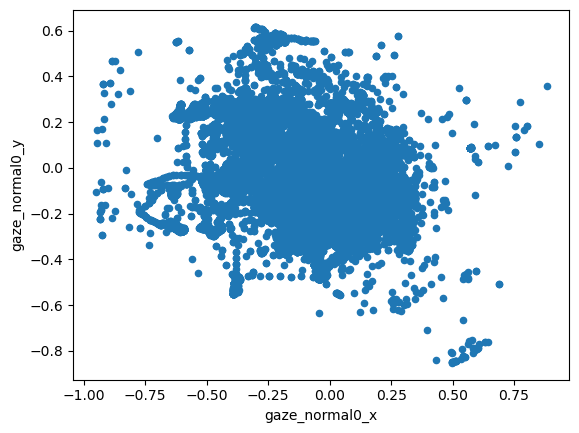

In [74]:
%matplotlib inline
final_surface[['gaze_normal0_x','gaze_normal0_y']].plot(x='gaze_normal0_x',y='gaze_normal0_y',kind='scatter',)

LEts normalize coordinates. Gaze postitions are between [-1,1] and surface positions are between [0,1]

In [75]:
from data_curation import Normalization
norm=Normalization()
final_surface['gaze_normal0_x']=norm.normalize(values=final_surface['gaze_normal0_x'].values)
final_surface['gaze_normal0_y']=1-norm.normalize(values=final_surface['gaze_normal0_y'].values)
final_surface['gaze_normal1_x']=norm.normalize(values=final_surface['gaze_normal1_x'].values)
final_surface['gaze_normal1_y']=1-norm.normalize(values=final_surface['gaze_normal1_y'].values)


<AxesSubplot: xlabel='gaze_normal0_x', ylabel='gaze_normal0_y'>

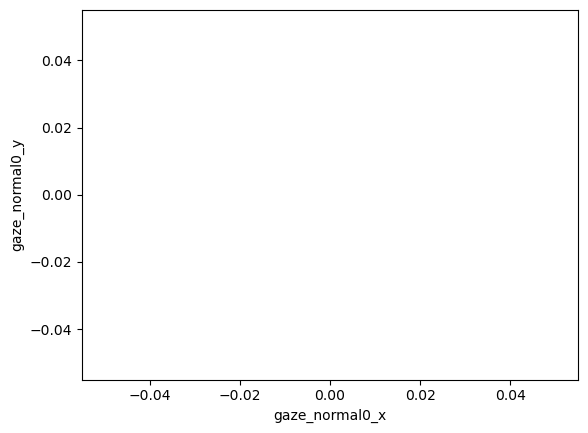

In [76]:
final_surface[['gaze_normal0_x','gaze_normal0_y']].plot(x='gaze_normal0_x',y='gaze_normal0_y',kind='scatter',)

In [77]:
(final_surface['on_surf']==True) & (final_surface['confidence_x']>0.95)

0         False
1         False
2         False
3         False
4         False
          ...  
161136    False
161137    False
161138    False
161139    False
161140    False
Length: 161141, dtype: bool

In [98]:
final_surface=final_surface.loc[(final_surface['on_surf']==True) & (final_surface['confidence_x']>0.95),
                  ['gaze_timestamp',
                   'confidence_x',
                   'world_index_x',
                   'norm_pos_x',
                   'x_norm',
                   'y_norm',
                   'norm_pos_y',
                   'gaze_normal0_x',
                   'gaze_normal0_y',
                   'gaze_normal1_x',
                   'gaze_normal1_y',
                   'eye_center0_3d_x',
                   'eye_center0_3d_y',
                   'eye_center1_3d_x',
                   'eye_center1_3d_y',
                   'on_surf']]

In [79]:
from data_curation import Normalization
norm=Normalization()
final_surface['gaze_normal0_x']=norm.normalize(values=final_surface['gaze_normal0_x'].values)
final_surface['gaze_normal0_y']=1-norm.normalize(values=final_surface['gaze_normal0_y'].values)
final_surface['gaze_normal1_x']=norm.normalize(values=final_surface['gaze_normal1_x'].values)
final_surface['gaze_normal1_y']=1-norm.normalize(values=final_surface['gaze_normal1_y'].values)


# final_surface['x_norm']=norm.normalize(values=final_surface['gaze_normal0_x'].values)
# final_surface['y_norm']=norm.normalize(values=final_surface['gaze_normal0_y'].values)


In [99]:
final_surface[['x_norm','y_norm']].shape

(133194, 2)

<AxesSubplot: xlabel='x_norm', ylabel='y_norm'>

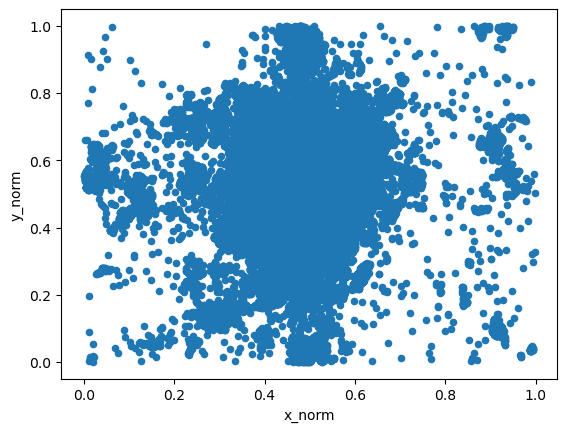

In [100]:
%matplotlib inline
final_surface[['x_norm','y_norm']].plot(x='x_norm',y='y_norm',kind='scatter',)

<AxesSubplot: xlabel='gaze_normal0_x', ylabel='gaze_normal0_y'>

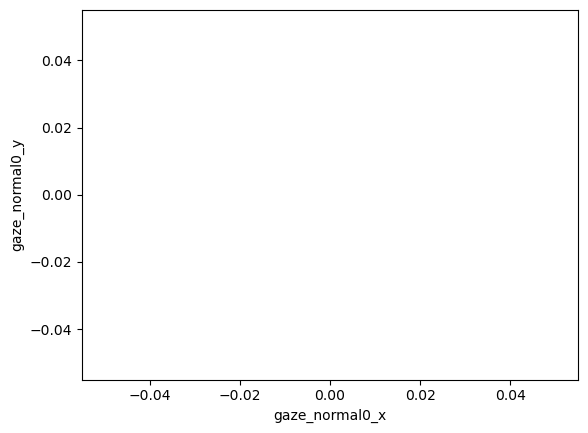

In [101]:
final_surface.plot(x='gaze_normal0_x',y='gaze_normal0_y',kind='scatter',)

<AxesSubplot: xlabel='gaze_normal1_x', ylabel='gaze_normal1_y'>

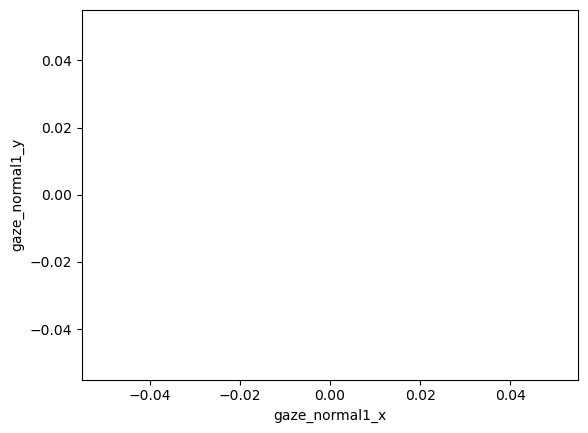

In [102]:
final_surface.plot(x='gaze_normal1_x',y='gaze_normal1_y',kind='scatter',)

<AxesSubplot: xlabel='eye_center1_3d_x', ylabel='eye_center1_3d_y'>

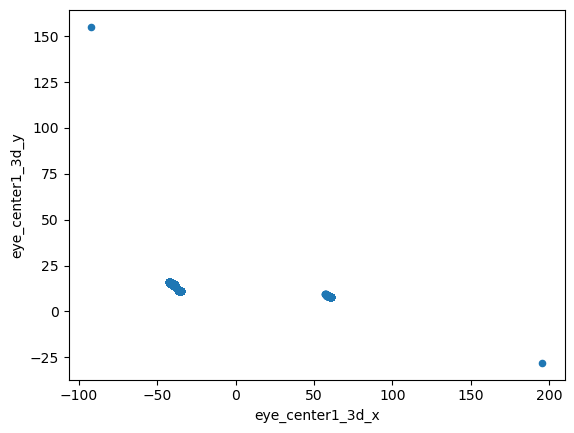

In [103]:
final_surface.plot(x='eye_center1_3d_x',y='eye_center1_3d_y',kind='scatter',)

array([[<AxesSubplot: title={'center': 'x_norm'}>]], dtype=object)

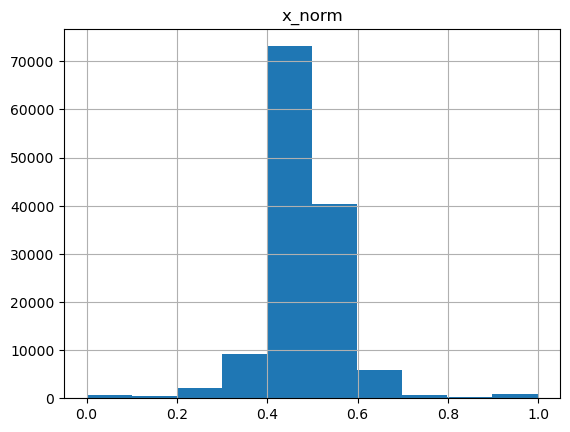

In [104]:
final_surface.hist('x_norm')

Lets do the heatmap

In [105]:
index_stim=annotations_pd['label']=='Asset0001.tif'
index_final=annotations_pd.index[index_stim]+1
index_final

Int64Index([72], dtype='int64')

In [106]:
final_surface.columns

Index(['gaze_timestamp', 'confidence_x', 'world_index_x', 'norm_pos_x',
       'x_norm', 'y_norm', 'norm_pos_y', 'gaze_normal0_x', 'gaze_normal0_y',
       'gaze_normal1_x', 'gaze_normal1_y', 'eye_center0_3d_x',
       'eye_center0_3d_y', 'eye_center1_3d_x', 'eye_center1_3d_y', 'on_surf'],
      dtype='object')

In [107]:
interval=0.1
value=annotations_pd[index_stim]['timestamp'].values[0]
value_final=annotations_pd.iloc[index_final]['timestamp'].values[0]
 
gaze_on_surf=final_surface.loc[
    (final_surface['gaze_timestamp']>value)&
    (final_surface['gaze_timestamp']<value_final),
                  ['world_index_x',
                   'norm_pos_x',
                   'x_norm',
                   'y_norm',
                   'norm_pos_y',
                   'gaze_normal0_x',
                   'gaze_normal0_y',
                   'gaze_normal1_x',
                   'gaze_normal1_y',
                    'eye_center0_3d_x',
                   'eye_center0_3d_y',
                   'eye_center1_3d_x',
                   'eye_center1_3d_y',
                   'on_surf']]

In [108]:
from data_curation import Normalization
norm=Normalization()
gaze_on_surf['gaze_normal0_x']=norm.normalize(values=gaze_on_surf['gaze_normal0_x'].values)
gaze_on_surf['gaze_normal0_y']=1-norm.normalize(values=gaze_on_surf['gaze_normal0_y'].values)
gaze_on_surf['gaze_normal1_x']=norm.normalize(values=gaze_on_surf['gaze_normal1_x'].values)
gaze_on_surf['gaze_normal1_y']=1-norm.normalize(values=gaze_on_surf['gaze_normal1_y'].values)


array([[<AxesSubplot: title={'center': 'gaze_normal1_y'}>]], dtype=object)

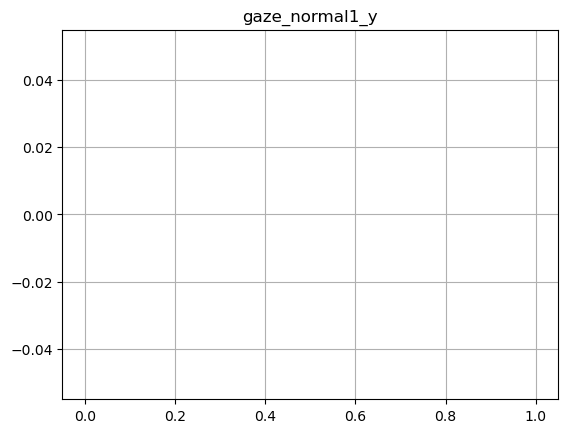

In [109]:
gaze_on_surf.hist('gaze_normal1_y')

In [110]:
image_location=r"../../../../../data/pupil_emotibit/ES0001_S002_PC_EM/images_order"
print_file_structure(image_location)


images_order/
    Asset0001_24.tif
    Asset0002_37.tif
    Asset0003_43.tif
    Asset0004_15.tif
    Asset0005_01.tif
    Asset0006_20.tif
    Asset0007_19.tif
    Asset0008_35.tif
    Asset0009_16.tif
    Asset0010_49.tif
    Asset0011_12.tif
    Asset0012_25.tif
    Asset0014_48.tif
    Asset0015_46.tif
    Asset0016_18.tif
    Asset0017_34.tif
    Asset0018_28.tif
    Asset0020_45.tif
    Asset0021_08.tif
    Asset0022_17.tif
    Asset0024_40.tif
    Asset0026_38.tif
    Asset0027_39.tif
    Asset0028_33.tif
    Asset0029_44.tif
    Asset0030_04.tif
    Asset0031_22.tif
    Asset0032_03.tif
    Asset0033_05.tif
    Asset0034_32.tif
    Asset0035_13.tif
    Asset0036_26.tif
    Asset0037_36.tif
    Asset0039_09.tif
    Asset0040_47.tif
    Asset0041_06.tif
    Asset0042_07.tif
    Asset0043_27.tif
    Asset0044_02.tif
    Asset0045_31.tif
    Asset0046_11.tif
    Asset0047_29.tif
    Asset0048_23.tif
    Asset0049_41.tif
    Asset0050_14.tif
    Surprise01_42.tif
    Surprise02_21.t

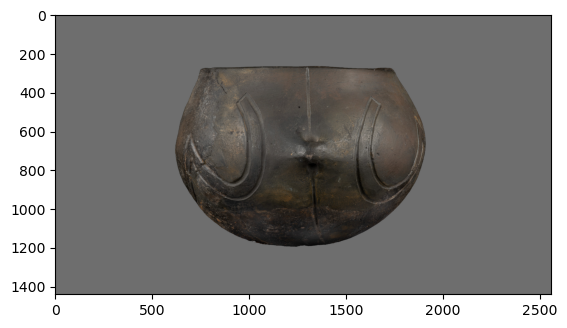

In [111]:
image=plt.imread(image_location+'/Asset0001_24.tif')
fig,ax=plt.subplots(1,1)
ax.imshow(image[:,:,:])


<AxesSubplot: xlabel='x_norm', ylabel='y_norm'>

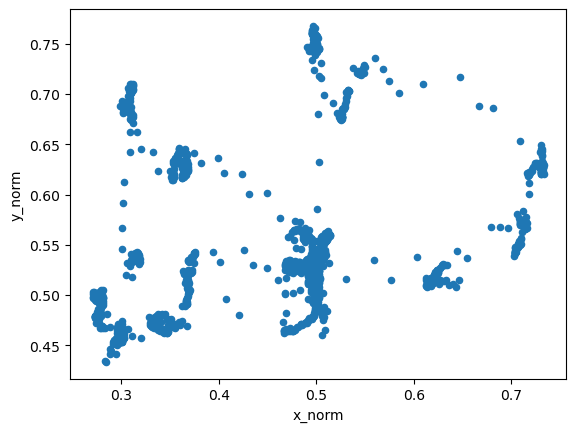

In [112]:
%matplotlib inline
gaze_on_surf[['x_norm','y_norm']].plot(x='x_norm',y='y_norm',kind='scatter',)

<AxesSubplot: xlabel='norm_pos_x', ylabel='norm_pos_y'>

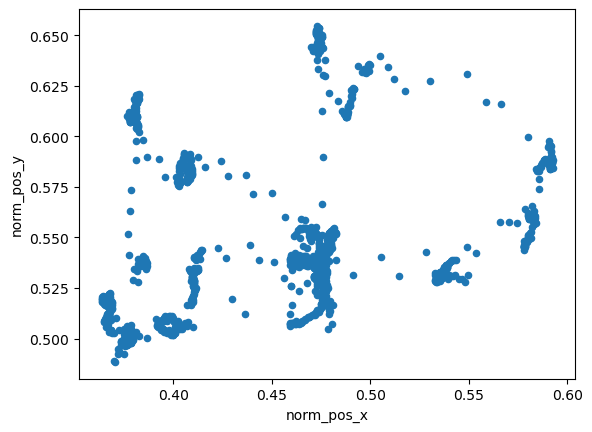

In [113]:
%matplotlib inline
gaze_on_surf.plot(x='norm_pos_x',y='norm_pos_y',kind='scatter',)

<AxesSubplot: xlabel='gaze_normal0_x', ylabel='gaze_normal0_y'>

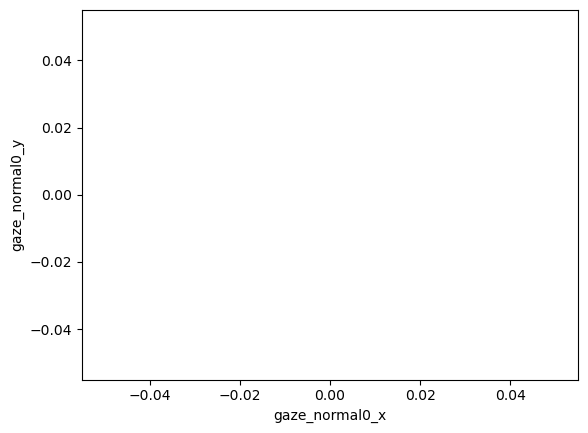

In [114]:
gaze_on_surf.plot(x='gaze_normal0_x',y='gaze_normal0_y',kind='scatter',)

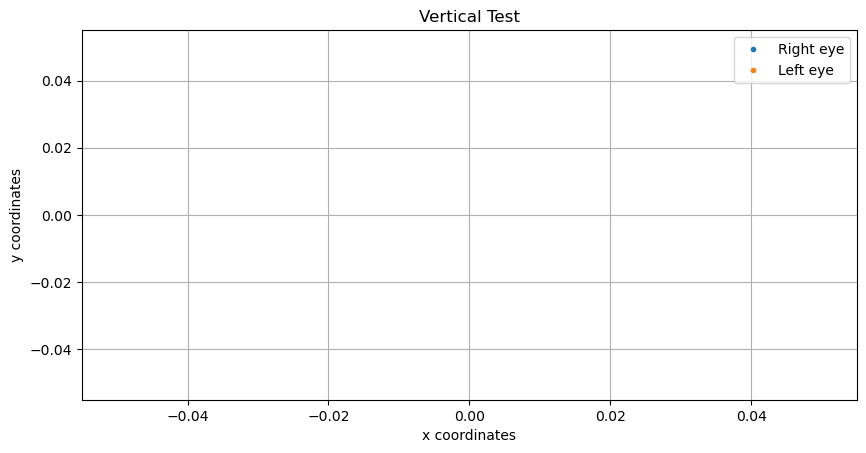

In [115]:
import commons as cm

x_0=gaze_on_surf['gaze_normal0_x']
y_0=1-gaze_on_surf['gaze_normal0_y']
x_1=gaze_on_surf['gaze_normal1_x']
y_1=1-gaze_on_surf['gaze_normal1_y']

cm.plot_gaze_eyes(x_0,y_0,x_1,y_1)

KeyError: 'norm_po'

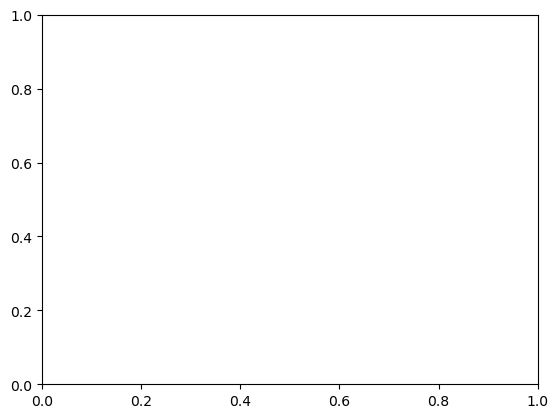

In [116]:
gaze_on_surf.plot(x='norm_po',y='gaze_normal1_y',kind='scatter',)

C:\Users\Bolo\AppData\Local\Temp\ipykernel_28436\264733162.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


Cover image with heatmap overlay


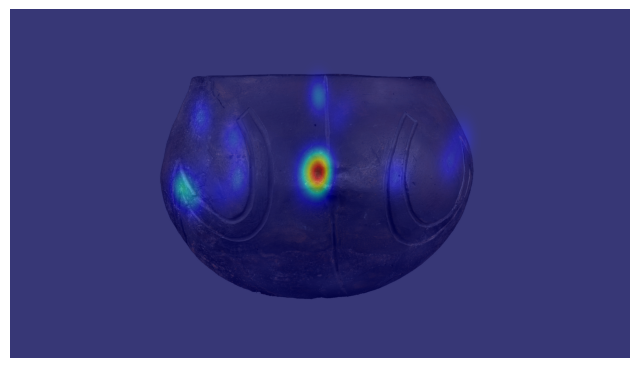

In [ ]:
from scipy.ndimage.filters import gaussian_filter

%matplotlib inline

grid = image.shape[0:2] # height, width of the loaded image
heatmap_detail = 0.02 # this will determine the gaussian blur kerner of the image (higher number = more blur)

gaze_on_surf_x = gaze_on_surf['x_norm']
gaze_on_surf_y = gaze_on_surf['y_norm']

# flip the fixation points
# from the original coordinate system,
# where the origin is at botton left,
# to the image coordinate system,
# where the origin is at top left
gaze_on_surf_y = 1 - gaze_on_surf_y

# make the histogram
hist, x_edges, y_edges = np.histogram2d(
    gaze_on_surf_y,
    gaze_on_surf_x,
    range=[[0, 1.0], [0, 1.0]],
    bins=grid
)


# gaussian blur kernel as a function of grid/surface size
filter_h = int(heatmap_detail * grid[0]) // 2 * 2 + 1
filter_w = int(heatmap_detail * grid[1]) // 2 * 2 + 1
heatmap = gaussian_filter(hist, sigma=(filter_w, filter_h), order=0)

# display the histogram and reference image
print("Cover image with heatmap overlay")
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.axis('off');



C:\Users\Bolo\AppData\Local\Temp\ipykernel_28436\1861278657.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


Cover image with heatmap overlay


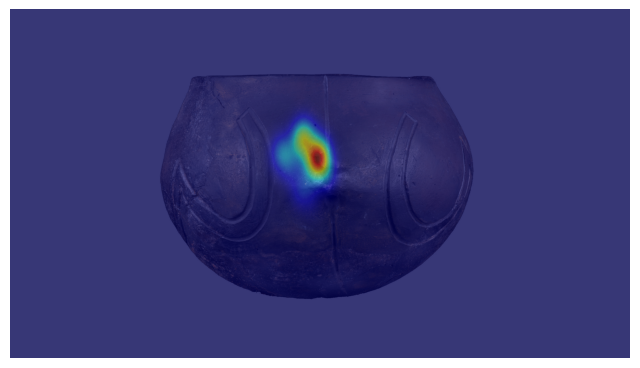

In [ ]:
from scipy.ndimage.filters import gaussian_filter

%matplotlib inline

grid = image.shape[0:2] # height, width of the loaded image
heatmap_detail = 0.02 # this will determine the gaussian blur kerner of the image (higher number = more blur)

gaze_on_surf_x = gaze_on_surf['norm_pos_x']
gaze_on_surf_y = gaze_on_surf['norm_pos_y']

# flip the fixation points
# from the original coordinate system,
# where the origin is at botton left,
# to the image coordinate system,
# where the origin is at top left
gaze_on_surf_y = 1- gaze_on_surf_y

# make the histogram
hist, x_edges, y_edges = np.histogram2d(
    gaze_on_surf_y,
    gaze_on_surf_x,
    range=[[0, 1.0], [0, 1.0]],
    bins=grid
)


# gaussian blur kernel as a function of grid/surface size
filter_h = int(heatmap_detail * grid[0]) // 2 * 2 + 1
filter_w = int(heatmap_detail * grid[1]) // 2 * 2 + 1
heatmap = gaussian_filter(hist, sigma=(filter_w, filter_h), order=0)

# display the histogram and reference image
print("Cover image with heatmap overlay")
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.axis('off');


C:\Users\Bolo\AppData\Local\Temp\ipykernel_28436\2612909739.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


Cover image with heatmap overlay


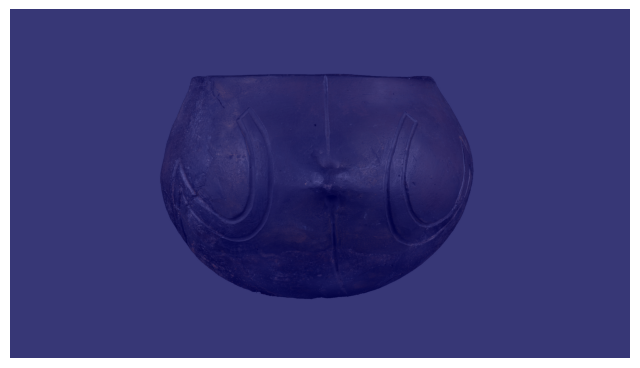

In [ ]:
from scipy.ndimage.filters import gaussian_filter

%matplotlib inline

grid = image.shape[0:2] # height, width of the loaded image
heatmap_detail = 0.02 # this will determine the gaussian blur kerner of the image (higher number = more blur)

gaze_on_surf_x = gaze_on_surf['gaze_normal1_x']
gaze_on_surf_y = gaze_on_surf['gaze_normal1_y']

# flip the fixation points
# from the original coordinate system,
# where the origin is at botton left,
# to the image coordinate system,
# where the origin is at top left
gaze_on_surf_y = 1 - gaze_on_surf_y

# make the histogram
hist, x_edges, y_edges = np.histogram2d(
    gaze_on_surf_y,
    gaze_on_surf_x,
    range=[[0, 1.0], [0, 1.0]],
    bins=grid
)


# gaussian blur kernel as a function of grid/surface size
filter_h = int(heatmap_detail * grid[0]) // 2 * 2 + 1
filter_w = int(heatmap_detail * grid[1]) // 2 * 2 + 1
heatmap = gaussian_filter(hist, sigma=(filter_w, filter_h), order=0)

# display the histogram and reference image
print("Cover image with heatmap overlay")
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.axis('off');


C:\Users\Bolo\AppData\Local\Temp\ipykernel_28436\880292900.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


Cover image with heatmap overlay


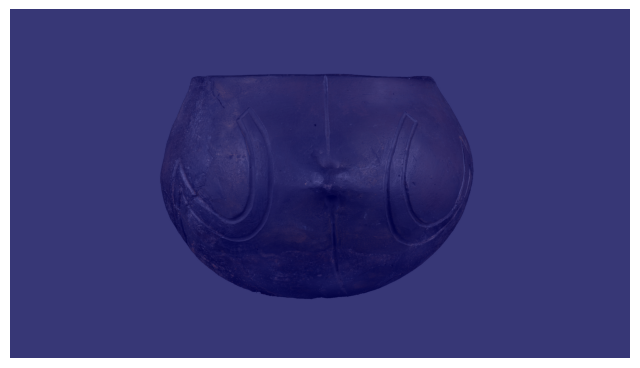

In [ ]:
from scipy.ndimage.filters import gaussian_filter

%matplotlib inline

grid = image.shape[0:2] # height, width of the loaded image
heatmap_detail = 0.02 # this will determine the gaussian blur kerner of the image (higher number = more blur)

gaze_on_surf_x = pd.concat([gaze_on_surf['gaze_normal1_x'], gaze_on_surf['gaze_normal0_x']], axis=0)
gaze_on_surf_y =pd.concat([gaze_on_surf['gaze_normal1_y'], gaze_on_surf['gaze_normal0_y']], axis=0)

# flip the fixation points
# from the original coordinate system,
# where the origin is at botton left,
# to the image coordinate system,
# where the origin is at top left
gaze_on_surf_y = 1 - gaze_on_surf_y

# make the histogram
hist, x_edges, y_edges = np.histogram2d(
    gaze_on_surf_y,
    gaze_on_surf_x,
    range=[[0, 1.0], [0, 1.0]],
    bins=grid
)


# gaussian blur kernel as a function of grid/surface size
filter_h = int(heatmap_detail * grid[0]) // 2 * 2 + 1
filter_w = int(heatmap_detail * grid[1]) // 2 * 2 + 1
heatmap = gaussian_filter(hist, sigma=(filter_w, filter_h), order=0)

# display the histogram and reference image
print("Cover image with heatmap overlay")
plt.figure(figsize=(8,8))
plt.imshow(image)
plt.imshow(heatmap, cmap='jet', alpha=0.5)
plt.axis('off');
